<a href="https://colab.research.google.com/github/JayNguyen-123/TimeSeries1/blob/main/IMDbSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [ ]:
reviews = pd.read_csv('/content/a1_IMDB_Dataset.csv')
reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
reviews['sentiment'] = np.where(reviews['sentiment'] == 'positive', 1, 0)
sentences = reviews['review'].to_numpy()
labels = reviews['sentiment'].to_numpy()



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25)

print("Training data input shape: ", X_train.shape)
print("Training data output shape: ", y_train.shape)
print("Testing data input shape: ", X_test.shape)
print("Testing data output shape: ", y_test.shape)



Training data input shape:  (37500,)
Training data output shape:  (37500,)
Testing data input shape:  (12500,)
Testing data output shape:  (12500,)


In [ ]:
# we have specified oov_tok as “<OOV>” which will replace any unknown word in the text corpus
vocab_size = 10000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

tokenizer.fit_on_texts(X_train)
print("Number of document: ", tokenizer.document_count)
print("Number of words: ", tokenizer.num_words)


Number of document:  37500
Number of words:  10000


In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)
max_length = 200
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')



In [ ]:
embedding_dim = 16
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.save("mymodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import keras
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=2), model_checkpoint_callback]

history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test), callbacks=callbacks)


Epoch 1/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 196s 164ms/step - accuracy: 0.7048 - loss: 0.5366 - val_accuracy: 0.8594 - val_loss: 0.3355
Epoch 2/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 188s 160ms/step - accuracy: 0.8948 - loss: 0.2697 - val_accuracy: 0.8718 - val_loss: 0.3112
Epoch 3/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 203s 160ms/step - accuracy: 0.9193 - loss: 0.2178 - val_accuracy: 0.8662 - val_loss: 0.3471
Epoch 4/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 180s 154ms/step - accuracy: 0.9343 - loss: 0.1813 - val_accuracy: 0.8690 - val_loss: 0.3256


In [ ]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

   accuracy      loss  val_accuracy  val_loss
0  0.795867  0.432327       0.85936  0.335538
1  0.893653  0.270574       0.87176  0.311222
2  0.914800  0.224563       0.86616  0.347079
3  0.928773  0.192216       0.86904  0.325562


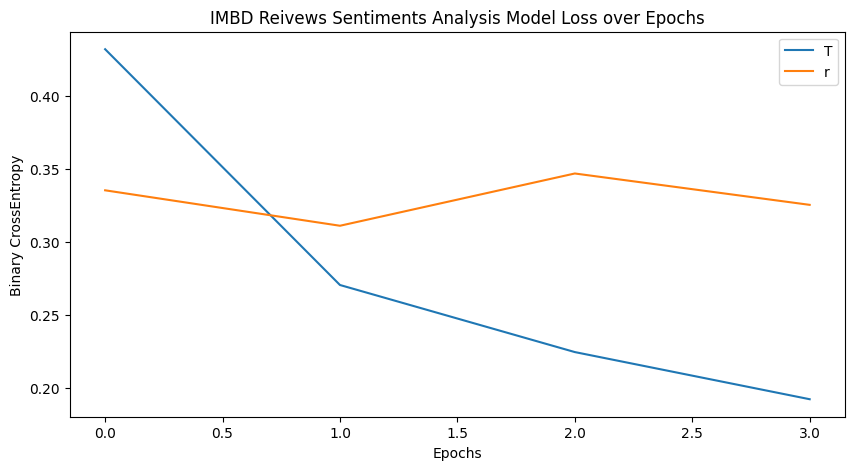

In [ ]:


plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.loss)
plt.plot(metrics_df.index, metrics_df.val_loss)
plt.title("IMBD Reivews Sentiments Analysis Model Loss over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Binary CrossEntropy')
plt.legend('Training Loss, Validation Loss')
plt.show()



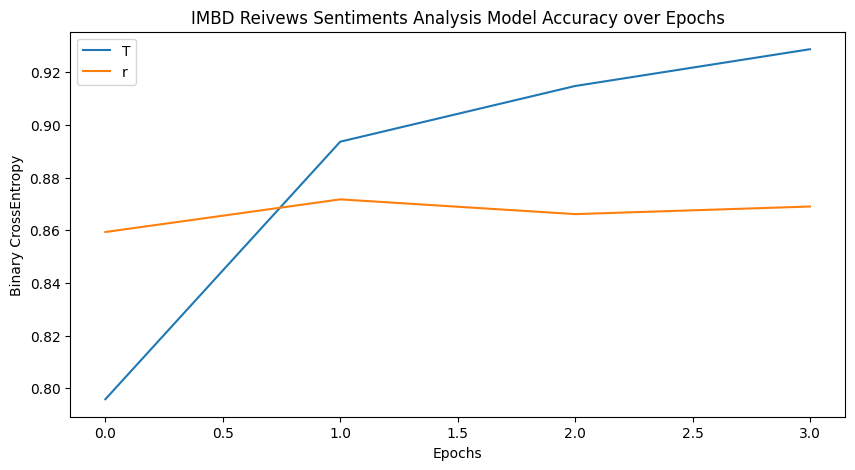

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.accuracy)
plt.plot(metrics_df.index, metrics_df.val_accuracy)
plt.title("IMBD Reivews Sentiments Analysis Model Accuracy over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Binary CrossEntropy')
plt.legend('Training Accuracy, Validation Accuracy')
plt.show()

In [ ]:
# reviews on which we need to predict
sentence = ["The movie was very touching and heart whelming",
            "I have never seen a terrible movie like this",
            "the movie plot is terrible but it had good acting"]
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)
# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
# Get labels based on probability 1 if p>= 0.5 else 0
prediction = model.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)